<a href="https://www.kaggle.com/code/kaushalpowar/cyclist-case-study?scriptVersionId=109941532" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyclistic/202101-divvy-tripdata/202101-divvy-tripdata.csv
/kaggle/input/cyclistic/202012-divvy-tripdata/202012-divvy-tripdata.csv
/kaggle/input/cyclistic/202004-divvy-tripdata/202004-divvy-tripdata.csv
/kaggle/input/cyclistic/202006-divvy-tripdata/202006-divvy-tripdata.csv
/kaggle/input/cyclistic/202009-divvy-tripdata/202009-divvy-tripdata.csv
/kaggle/input/cyclistic/202011-divvy-tripdata/202011-divvy-tripdata.csv
/kaggle/input/cyclistic/202008-divvy-tripdata/202008-divvy-tripdata.csv
/kaggle/input/cyclistic/202007-divvy-tripdata/202007-divvy-tripdata.csv
/kaggle/input/cyclistic/202102-divvy-tripdata/202102-divvy-tripdata.csv
/kaggle/input/cyclistic/202103-divvy-tripdata/202103-divvy-tripdata.csv
/kaggle/input/cyclistic/202005-divvy-tripdata/202005-divvy-tripdata.csv
/kaggle/input/cyclistic/202010-divvy-tripdata/202010-divvy-tripdata.csv


# Case Study: How Does a Bike-Share Navigate Speedy Success?

*This case study is part of the Capstone of the Google Data Analytics Professional Certificate*

# Introduction

The bike-share company Cyclistic, in Chicago wants to analyze how casual riders and annual members use 
Cyclistic bikes differently because they want to desing a strategy to increase the annual member.

As a part of this project, analyzing historical data, I want to answer the questions, whether there is or no difference between those types of users.

In order to answer the key business questions, I will follow the steps of the data analysis process:
**ask, prepare, process, analyze, share, and act.**



## Phase 1: Ask

**Key tasks**
1. The business task

•Here I have Identified the business task, that is 
**how annual members and casual riders use Cyclistic bikes differently** 
because the company want to increase the number of annual members.

2. Key stakeholders

**Lily Moreno:** the directo of marketing and my manager. She believes that the future of the company depends on maximizing the number of annual memberships.
**Marketing analytics team:** Me.



## Phase 2: Prepare
* Data is locates at https://divvy-tripdata.s3.amazonaws.com/index.html
* Data is organiszed in a folder containing 12 subfolders have 12 csv files from April 2020 to March 2021.
* The data is ROCCC because it's reliable, original, comprehensive, current and cited.
* The company has their own licence over the dataset. Besides that, the dataset doesn't have any personal information about the riders.
* I have verifies Data integrity & all the files have consistent columns and each column has the correct type of data.






## Phase 3: Process


As the csv files are in 12 different, I have merged them together into a single Dataframe.

### Load data

In [3]:
# merging two csv files
df = pd.concat(
    map(pd.read_csv, ['../input/cyclistic/202004-divvy-tripdata/202004-divvy-tripdata.csv',
                      '../input/cyclistic/202005-divvy-tripdata/202005-divvy-tripdata.csv',
                      '../input/cyclistic/202006-divvy-tripdata/202006-divvy-tripdata.csv',
                      '../input/cyclistic/202007-divvy-tripdata/202007-divvy-tripdata.csv',
                      '../input/cyclistic/202008-divvy-tripdata/202008-divvy-tripdata.csv',
                      '../input/cyclistic/202009-divvy-tripdata/202009-divvy-tripdata.csv',
                      '../input/cyclistic/202010-divvy-tripdata/202010-divvy-tripdata.csv',
                      '../input/cyclistic/202011-divvy-tripdata/202011-divvy-tripdata.csv',
                      '../input/cyclistic/202012-divvy-tripdata/202012-divvy-tripdata.csv',
                      '../input/cyclistic/202101-divvy-tripdata/202101-divvy-tripdata.csv',
                      '../input/cyclistic/202102-divvy-tripdata/202102-divvy-tripdata.csv',
                      '../input/cyclistic/202103-divvy-tripdata/202103-divvy-tripdata.csv'
                     ]), ignore_index=True)


### Data information

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489748 entries, 0 to 3489747
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 346.1+ MB


There are total 13 columns.
* 8 columns have Object data type(Categorical)
* 4 columns have float data type(Numerical)

Chek for null value 

### Null values in data

In [6]:
# Total percentage of null values in the data
a=(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])*100

print(f"{round(a, 4)} % data is having null values")

1.1934 % data is having null values


In [7]:
import seaborn as sns    
import matplotlib.pyplot as plt


<AxesSubplot:>

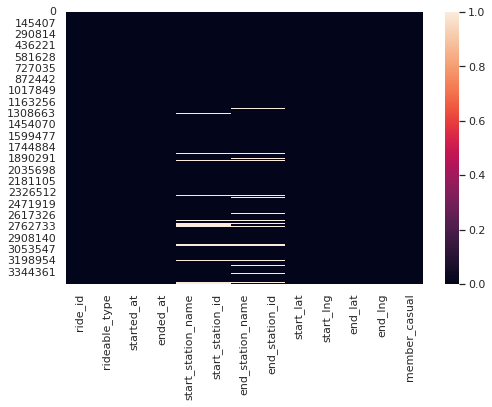

In [8]:
# Checking for null values using a heat map as a visualizing tool
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
sns.heatmap(df.isnull())


From above observations Null values are very few.

In [9]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122175
start_station_id      122801
end_station_name      143242
end_station_id        143703
start_lat                  0
start_lng                  0
end_lat                 4738
end_lng                 4738
member_casual              0
dtype: int64

### Null values in columns

In [10]:
(df.isna().sum())/3489748*100

ride_id               0.000000
rideable_type         0.000000
started_at            0.000000
ended_at              0.000000
start_station_name    3.500969
start_station_id      3.518907
end_station_name      4.104652
end_station_id        4.117862
start_lat             0.000000
start_lng             0.000000
end_lat               0.135769
end_lng               0.135769
member_casual         0.000000
dtype: float64

#### Missing values in our data are less than 5% so we can continue our analysis by dropping null values. 

In [11]:
#dropping null values
df.dropna(axis=0, inplace=True)

In [12]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

#### Checking duplicated rows

In [13]:
df.duplicated().sum()

0

#### There are no duplicated rows.

### Changing format

#### 'started_at' & 'ended_at' should be in data time format.
#### Let's convert columns 'started_at' and 'ended_at' to 'datetime' Datatype.



In [14]:
df['started_at']= pd.to_datetime(df['started_at'],dayfirst=True)

In [15]:
df['ended_at']= pd.to_datetime(df['ended_at'], dayfirst=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3294691 entries, 0 to 3489746
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 351.9+ MB


Lets create new columns "Hours","Month" & "Day".

### Extract new columns

In [17]:
df['Hour']=df.started_at.apply(lambda x: x.hour)

In [18]:
df['Month']= df.started_at.apply(lambda x: x.month)

In [19]:
df["Day"]= df.started_at.apply(lambda x: x.day_name())

In [53]:
df["Year"]= df.started_at.apply(lambda x: x.year)

In [54]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,Hour,Month,Day,Total_ride_time,lat,lng,Distance,Month_name,Year
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,...,member,17,4,Sunday,26.8,0.0358,0.0024,3.9827,April,2020
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,...,member,17,4,Friday,8.2,0.0062,-0.0084,1.1589,April,2020
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,...,member,17,4,Wednesday,14.4,-0.0266,-0.0051,3.0064,April,2020
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,...,member,12,4,Tuesday,12.2,-0.0038,0.0253,2.8398,April,2020
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,...,casual,10,4,Saturday,52.9,0.0793,-0.0285,9.3535,April,2020


#### Now we'll calculate total ride time in minutes

In [21]:
import datetime
from datetime import timedelta

In [22]:
df["Total_ride_time"]=df["ended_at"]-df["started_at"]

In [23]:
df["Total_ride_time"]=(df["Total_ride_time"]/timedelta(minutes=1))

In [24]:
df["Total_ride_time"]=(df["Total_ride_time"].round(decimals=1))

In [25]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Hour,Month,Day,Total_ride_time
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,17,4,Sunday,26.8
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,17,4,Friday,8.2
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,17,4,Wednesday,14.4
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12,4,Tuesday,12.2
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,10,4,Saturday,52.9


In [26]:
df['rideable_type'].unique().sum()

'docked_bikeelectric_bikeclassic_bike'

#### Calculate ride distance in kms

In [27]:
df['lat']=df["end_lat"]-df["start_lat"]

In [28]:
df['lng']=df["end_lng"]-df["start_lng"]

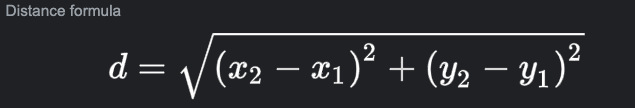

In [29]:
import math

In [30]:
df["Distance"]=np.sqrt((df["lat"]**2)+(df["lng"]**2))

#### One degree of latitude. = 40,000/360 = 111km (approximately.)

In [31]:
df["Distance"]=df["Distance"]*111

In [32]:
df["Distance"]=df["Distance"].round(decimals=4)

In [33]:
df["Distance"].head()

0    3.9827
1    1.1589
2    3.0064
3    2.8398
4    9.3535
Name: Distance, dtype: float64

In [34]:
month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}


In [35]:
df["Month_name"]=df["Month"].map(month)

In [56]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,Hour,Month,Day,Total_ride_time,lat,lng,Distance,Month_name,Year
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,...,member,17,4,Sunday,26.8,0.0358,0.0024,3.9827,April,2020
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,...,member,17,4,Friday,8.2,0.0062,-0.0084,1.1589,April,2020
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,...,member,17,4,Wednesday,14.4,-0.0266,-0.0051,3.0064,April,2020
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,...,member,12,4,Tuesday,12.2,-0.0038,0.0253,2.8398,April,2020
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,...,casual,10,4,Saturday,52.9,0.0793,-0.0285,9.3535,April,2020


# Phase 4: Analyze

In [37]:
sns.set(style="whitegrid", color_codes=True)


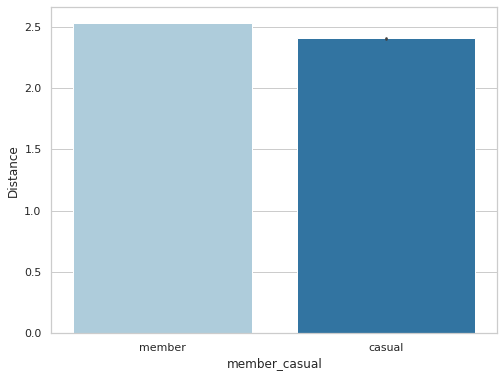

In [71]:
plt.figure(figsize=(8,6))

sns.barplot(x='member_casual', y='Distance', data=df, palette="Paired")

plt.show()


<AxesSubplot:xlabel='member_casual', ylabel='Total_ride_time'>

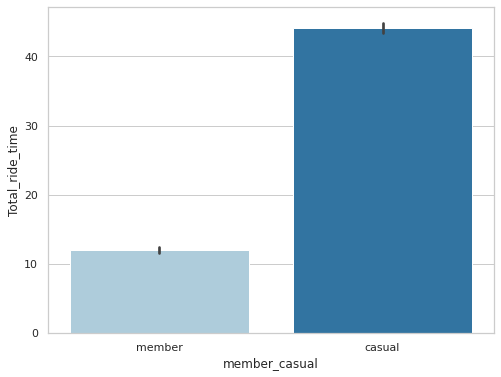

In [70]:
plt.figure(figsize=(8,6))
sns.barplot(x='member_casual', y='Total_ride_time', data=df, palette='Paired')

In the first plot, we observe that the member riders have travelled longer distance than the casual riders. However the second plot for 'Total Ride Time' shows casual bikers have more ride time than the member bikers.

We can conclude from the above observations that member riders have short journeys compared to casual ones. Their travel frequency is higher but travel time is lower.



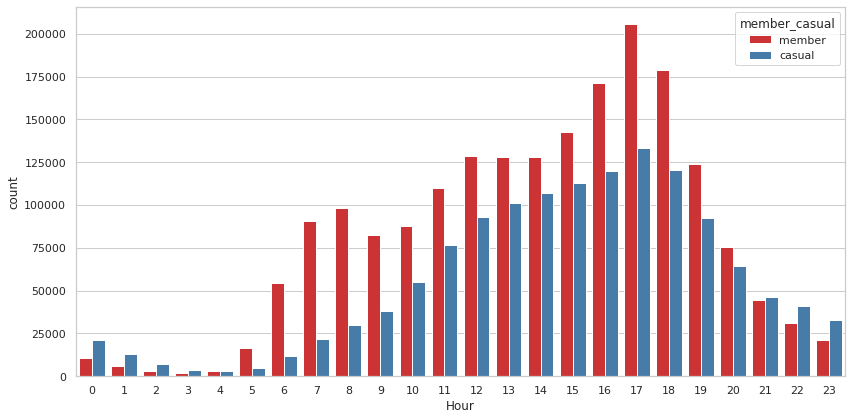

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', hue='member_casual', data=df, palette='Set1')
plt.tight_layout()

<AxesSubplot:xlabel='Month_name', ylabel='Hour'>

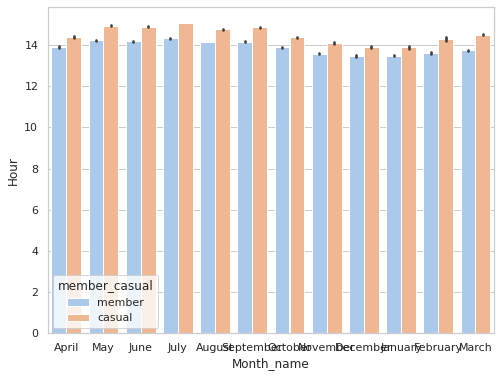

In [46]:
#plt.figure(figsize=(12,6))
#sns.countplot(x='Hour', y='Month_name' ,hue='member_casual', data=df, palette='Set1')
#plt.tight_layout()
plt.figure(figsize=(8,6))
sns.barplot(x='Month_name',y='Hour',hue='member_casual', data=df, palette='pastel')

Evening hours see a lot of traffic compared to other timings. This is largly because of office timings of member riders. Casual member also find evening hours productive to go for a ride.

Morning hours are again busy for member riders due to working hours. Casual members are using bikes for rides at late night somewhere around 9-11 PM.

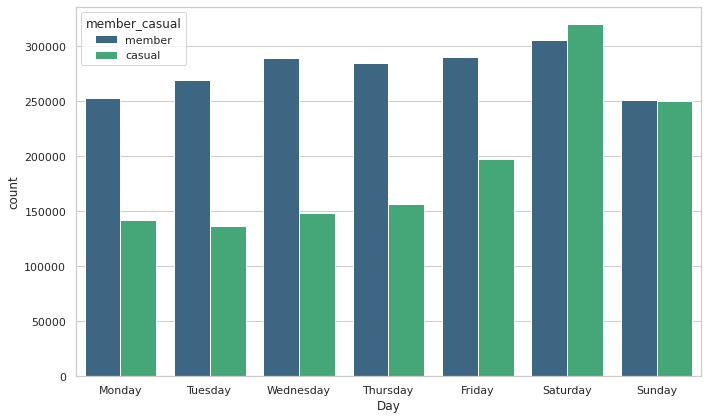

In [50]:
plt.figure(figsize=(10,6))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='Day', hue='member_casual', data=df, palette='viridis', order=order)
plt.tight_layout()

Casual riders are enthuasiatic on weekends as they have the highest bike usage on Saturday and Sunday.

Member riders have consistent use of bikes on weekdays.



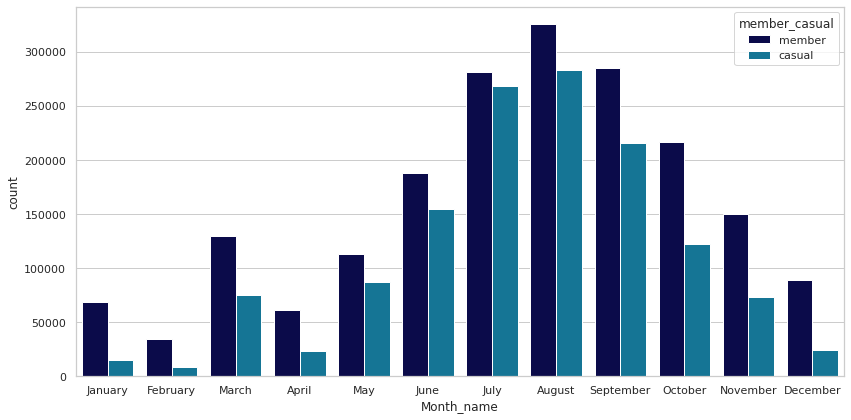

In [49]:
plt.figure(figsize=(12,6))
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
sns.countplot(x='Month_name', hue='member_casual', data=df, palette='ocean', order=order)
plt.tight_layout()

The summer months show the highest usage of bikes. This can be a starting point for preparing business strategy.

# Phase 5: Share
The share phase is usually done by building a presentation. But for kaggle, I have done representation of analysis & conclusion in this notebook.



# Conclusion

* Member riders have annual memberships because their frequency of bike usage is higher.They use it for daily commute of shorter distance.

* Casual riders more often use bikes for leisure or personal activities as their usage is observed higher on weekends.

* Summer months like July, August & September are more popular and company can focus on this period to maximise their profits.
#### Solution-
Special 'Summer Membership' can be introduced specifically for casual riders who're hesitant to go for annual membership.

